<a href="https://colab.research.google.com/github/Kedar14-byte/Click_links_EdcWebsite/blob/main/Global_Terrorism_Analysis_Capstone_Project_Kedar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **"*With Guns You Can Kill Terrorists, With Education You Can Kill Terrorism*" ―   Malala Yousafzai**


**Terrorism is the biggest hurdle to world peace. Terrorism is commonly
ignored by the civilians who are not affected directly by the dangers. For the most
part, terrorism is considered unpredictable and unfortunate calamity that strikes some parts
of the world more than others. Based on the location of the events, people at large have
very limited information about any such event happening in other parts of the world and
hence react differently. The objective of the project is to analyze the dataset
provided by START (Study of Terrorism and Response to Terrorism) to
explore meaningful patterns and statistics.**

In [1]:
# Importing all the required libraries for the data exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mounting the drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the csv file 
file_path = '/content/Global Terrorism Data.csv'
terrordf = pd.read_csv(file_path, encoding = "ISO-8859-1",low_memory=False)

since the dataset is not in UTF-8 encoding hence use ISO-8859-1 encoding to avoid the error 

In [4]:
terrordf.shape

(154512, 135)

In [5]:
terrordf.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN


In [6]:
#missing data
total = terrordf.isnull().sum().sort_values(ascending=False)
percent = round(((terrordf.isnull().sum()/terrordf.isnull().count())*100),2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data

,Total,Percentage
gsubname3,154505,100.00
weapsubtype4_txt,154442,99.95
weapsubtype4,154442,99.95
weaptype4,154439,99.95
weaptype4_txt,154439,99.95
...,...,...
suicide,0,0.00
success,0,0.00
crit3,0,0.00
property,0,0.00



*   **Since most of the columns contain Null Values , selecting only those columns which will be useful in our Data exploration Journey...**





In [7]:
# Renaming the Columns with the suitable names for understanding purpose
terrordf.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                         'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                         'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


In [8]:
# Keeping only those columns which are useful in our data exploration journey 
terrordf=terrordf[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
                   'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [9]:
#missing data in the selected columns
total = terrordf.isnull().sum().sort_values(ascending=False)
percent = round(((terrordf.isnull().sum()/terrordf.isnull().count())*100),2).sort_values(ascending=False)
new_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

new_missing_data

,Total,Percent
Motive,108159,70.00
Summary,66129,42.80
Wounded,13986,9.05
Killed,8778,5.68
longitude,4438,2.87
latitude,4437,2.87
Target,636,0.41
city,434,0.28
Weapon_type,0,0.00
Target_type,0,0.00


In [10]:
# Filling the null values 
terrordf['city'].fillna('Unknown',inplace =True)

terrordf['Target'].fillna('Unknown',inplace =True)

terrordf['Killed'].fillna(0,inplace =True)

In [11]:
terrordf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154512 entries, 0 to 154511
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         154512 non-null  int64  
 1   Month        154512 non-null  int64  
 2   Day          154512 non-null  int64  
 3   Country      154512 non-null  object 
 4   Region       154512 non-null  object 
 5   city         154512 non-null  object 
 6   latitude     150075 non-null  float64
 7   longitude    150074 non-null  float64
 8   AttackType   154512 non-null  object 
 9   Killed       154512 non-null  float64
 10  Wounded      140526 non-null  float64
 11  Target       154512 non-null  object 
 12  Summary      88383 non-null   object 
 13  Group        154512 non-null  object 
 14  Target_type  154512 non-null  object 
 15  Weapon_type  154512 non-null  object 
 16  Motive       46353 non-null   object 
 17  success      154512 non-null  int64  
dtypes: float64(4), int64(4),

In [12]:
# displaying the top 3 entries in the dataset along with its corresponding column name as we can see in the output below.
terrordf.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1


In [13]:
terrordf['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])



*   **As we can see from above, the Data for the Year 1993 is not present for some unknown reason**




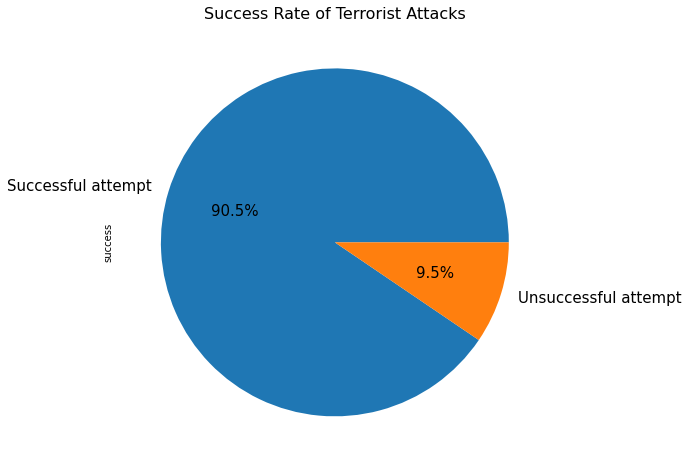

In [25]:
# Plotting the success percentage of all the attacks happened 
plt.figure(figsize=(8,8))
terrordf['success'].value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=15)
plt.title('Success Rate of Terrorist Attacks',fontsize = 16)
plt.show()



*   **The Success Rate of the terrorist attacks is 89%, which is a big issue of concern for the safety of citizens and organisations who are responsible for the safety of everyone.Let's explore more about these attacks...**




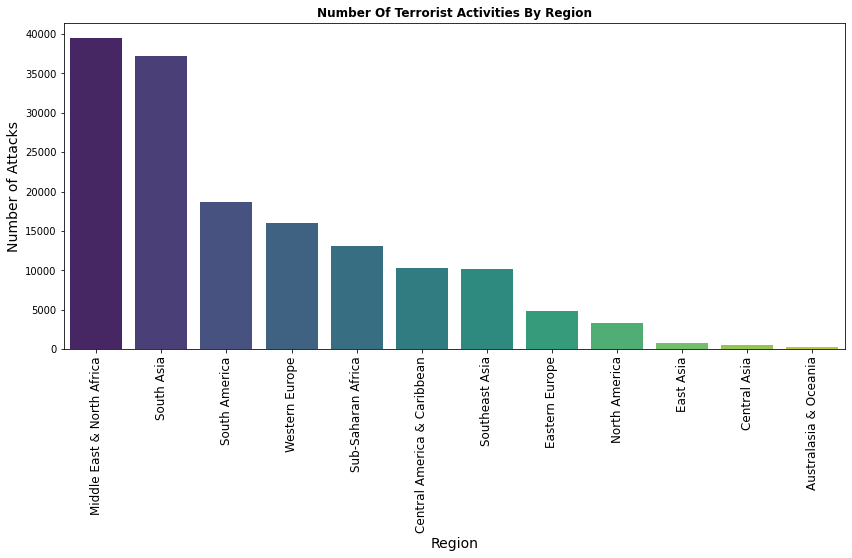

In [19]:
# Plotting No of Attacks Region wise
plt.subplots(figsize=(14,6))
sns.countplot(x='Region',data=terrordf,palette='viridis',order=terrordf['Region'].value_counts().index)
plt.xticks(rotation=90,fontsize = 12)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.title('Number Of Terrorist Activities By Region',fontweight = 'bold')
plt.show()

* **Middle East and North Africa are the most terrorism prone regions followed by
South Asia. The Australia and Oceania region has experienced fewer terrorist attacks**




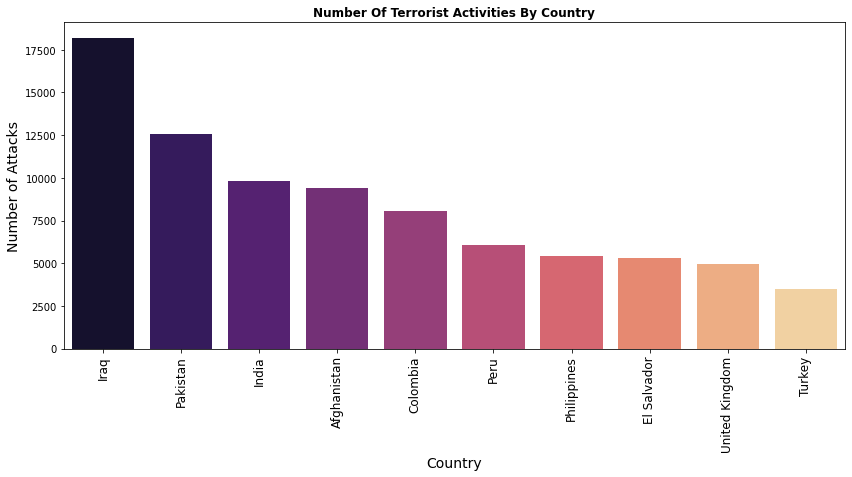

In [20]:
# Plotting No of attacks Country wise
plt.subplots(figsize=(14,6))
sns.countplot(x='Country',data=terrordf,palette='magma',order=terrordf['Country'].value_counts()[0:10].index)
plt.xticks(rotation=90,fontsize = 12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.title('Number Of Terrorist Activities By Country', fontweight = 'bold')
plt.show()

 

*   **The most number of attacks took place till now are in Iraq (~ 25,000) which is huge in (~ 50 years) i.e. on average ~ 500 attacks per year.**



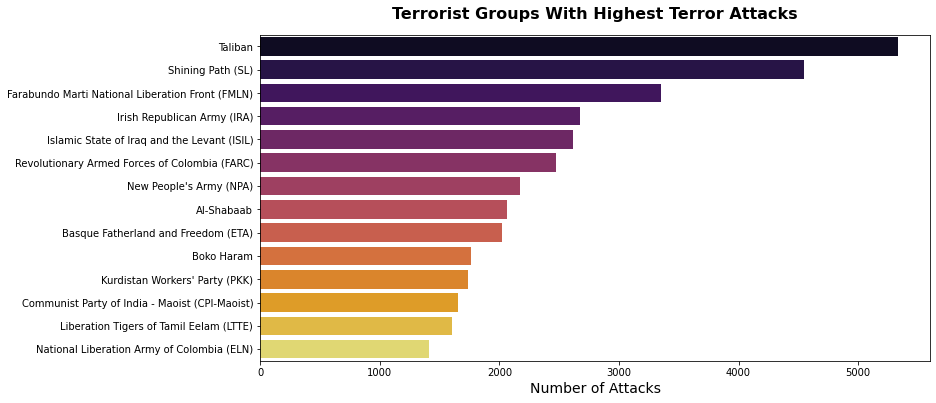

In [27]:
# Most No of attacks by various Terrorist Groups
plt.subplots(figsize=(12,6))
bar = sns.barplot(x=terrordf['Group'].value_counts()[1:15].values, y=terrordf['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xlabel('Number of Attacks', fontsize=14)
bar.set_title('Terrorist Groups With Highest Terror Attacks',fontdict={'fontsize':16,'fontweight':'bold'}, y=1.03);
# sns.set_context('talk')

* **The terrorist Groups that have led to most number of terrorist activities are: Taliban, Islamic State of Iraq and The Levant and Shining Path.**







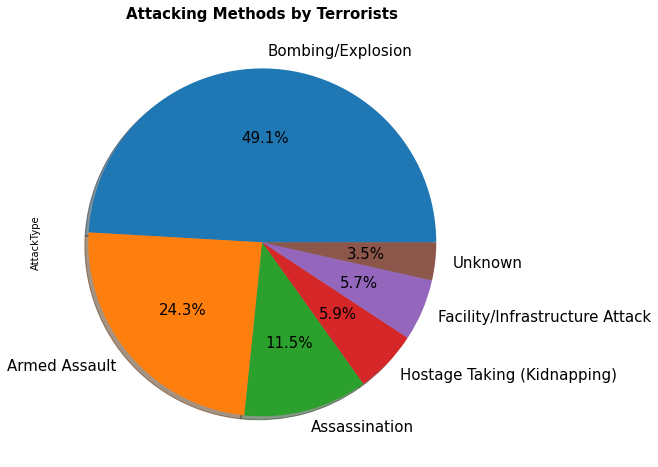

In [23]:
# Plotting Types of Attacks happened with their count 
plt.subplots(figsize=[14,8])
terrordf['AttackType'].value_counts()[0:6].plot(kind='pie',autopct='%1.1f%%',shadow=True, fontsize=15)
plt.title('Attacking Methods by Terrorists', fontsize = 15, fontweight = 'bold');



* **Most prominent attack mode of terrorist is Bomb/Explosion and Armed Assault**




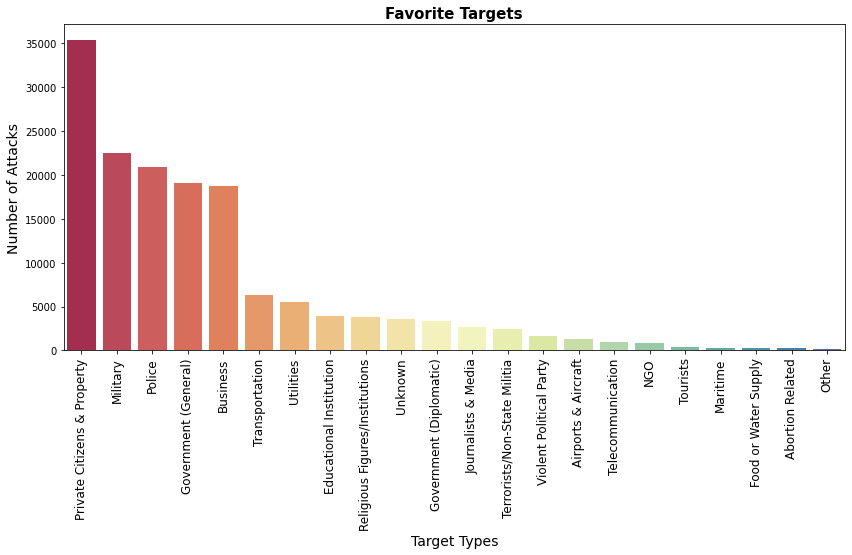

In [24]:
# Plotting the Target Types in the attacks
plt.subplots(figsize=[14,6])
sns.countplot(x= 'Target_type', data = terrordf, palette='Spectral', order = terrordf['Target_type'].value_counts().index)
plt.xlabel('Target Types',fontsize = 14)
plt.ylabel('Number of Attacks',fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Favorite Targets', fontsize = 15, fontweight = 'bold');



*   **It is evident that Private Citizens & Propoerty, Military and Police are most affected by the attacks**


